In [3]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_openml

from sklearn.decomposition import PCA

In [4]:
def mostrar_digito(digito):
    digito = digito.reshape(8, 8)

    plt.imshow(digito, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")
    plt.show()

# Cargando los Datos (MNIST)

In [5]:
from sklearn.datasets import load_digits
digits = load_digits()

x = digits.data
x.shape

(1797, 64)

In [6]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

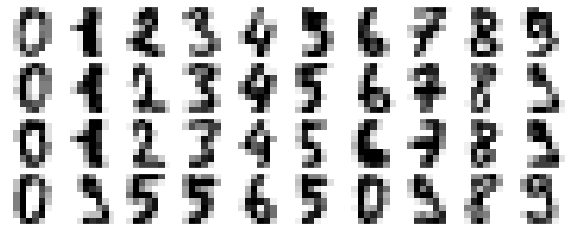

In [7]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(x)

In [9]:
#### PCA a 2 dimensiones ######
pca = PCA(n_components = 2)
X2D = pca.fit_transform(x)
X2D

array([[ -1.25946554,  21.2748824 ],
       [  7.95761373, -20.76870179],
       [  6.99192091,  -9.95598352],
       ...,
       [ 10.80128376,  -6.96025282],
       [ -4.87209968,  12.42395554],
       [ -0.34439193,   6.36555123]])

In [10]:
print(x.shape)
print(X2D.shape)

(1797, 64)
(1797, 2)


Text(0, 0.5, 'component 2')

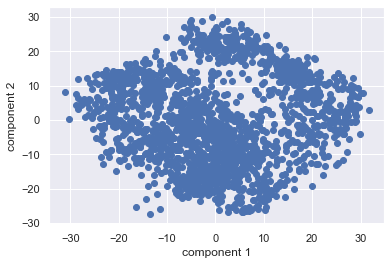

In [11]:
plt.scatter(X2D[:, 0], X2D[:, 1])
plt.xlabel('component 1')
plt.ylabel('component 2')


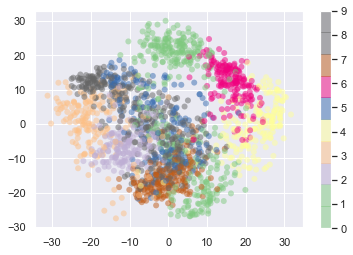

In [12]:
plt.scatter(X2D[:, 0], X2D[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.colorbar()

## K-means Clustering con Sklearn

[Documentacion oficial](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

In [20]:
## K-means
kmeans = KMeans(n_clusters=10, random_state=0).fit(X2D)

In [21]:
clusters = KMeans.fit_predict(kmeans, X2D, y=None, sample_weight=None)

In [22]:
kmeans.cluster_centers_.shape

(10, 2)

In [27]:
centers = kmeans.cluster_centers_
kmeans.cluster_centers_

array([[  1.68288385,  21.57906881],
       [-12.16275223,  10.9579235 ],
       [ -3.44071345,   0.25215788],
       [ 22.35507673,  -1.14786444],
       [ -3.82031774, -16.8129081 ],
       [-21.88590489,   6.88699398],
       [-14.42578798,  -6.58867042],
       [  9.20106838, -19.58457866],
       [ 16.66412892,  12.46497932],
       [  4.39878184,  -8.27749361]])

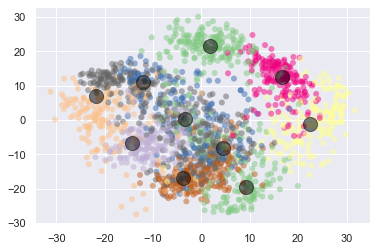

In [28]:
plt.scatter(X2D[:, 0], X2D[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
